#ISAT 449: Emerging Topics in Applied Science

##Final Exam Project: Project 2 - Custom Images

Author: Mallay Jalloh, Pat Whalen

### Objective:

*   To demonstrate the ability to complete an end-to-end data science / machine learning project using  image classification. Create Deep Machine Learning Models in TensorFlow 2.x Keras that use External Datasets as well as TensorFlow Datasets. Models must use Convolutional Neural Networks and Image Classification.

## **Import TensFlow and other libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## **Download and Explore the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
cd /content/drive/MyDrive/images/

/content/drive/MyDrive/images


In [ ]:
import pathlib
data_dir='/content/drive/MyDrive/images'
data_dir = pathlib.Path(data_dir)
print(data_dir)

/content/drive/MyDrive/images


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


1200


**Show the number of braid textures**

In [ ]:
braided_length = list(data_dir.glob('braided/*.*'))

In [ ]:
len(braided_length)

120

**Show the number of bubbly textures**

In [ ]:
bubbly_length = list(data_dir.glob('bubbly/*.*'))

In [ ]:
len(bubbly_length)

120

## **Here are crystalline textures**

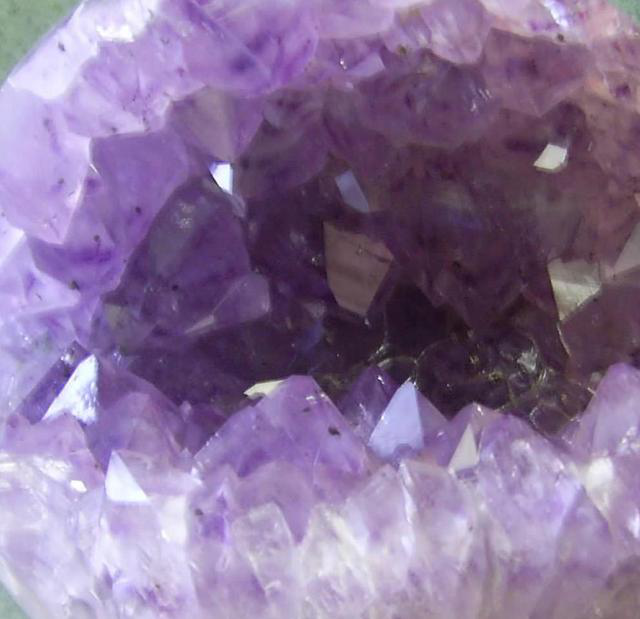

In [ ]:
crystalline = list(data_dir.glob('crystalline/*'))
PIL.Image.open(str(crystalline[4]))

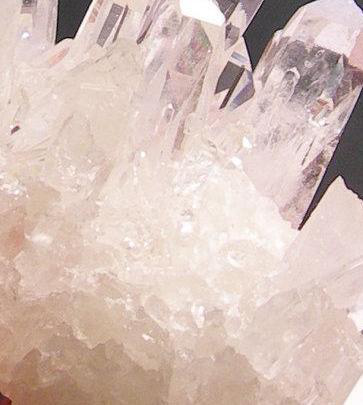

In [ ]:
PIL.Image.open(str(crystalline[1]))

## **Here are some Cobwebbed textures**

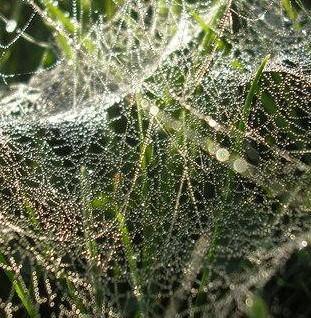

In [ ]:
cobwebbed = list(data_dir.glob('cobwebbed/*'))
PIL.Image.open(str(cobwebbed[2]))

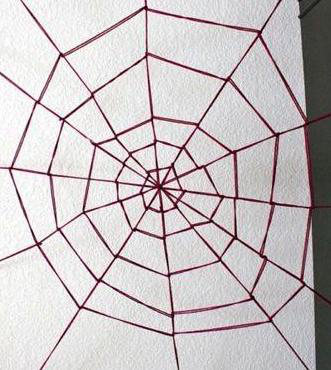

In [ ]:
PIL.Image.open(str(cobwebbed[1]))

## **Load using keras.preprocessing**
### *Create a dataset*

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1200 files belonging to 10 classes.
Using 960 files for training.


In [ ]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1200 files belonging to 10 classes.
Using 240 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['braided', 'bubbly', 'cobwebbed', 'cracked', 'crystalline', 'honeycombed', 'potholed', 'stained', 'waffled', 'wrinkled']


### *Visualize the dataset*

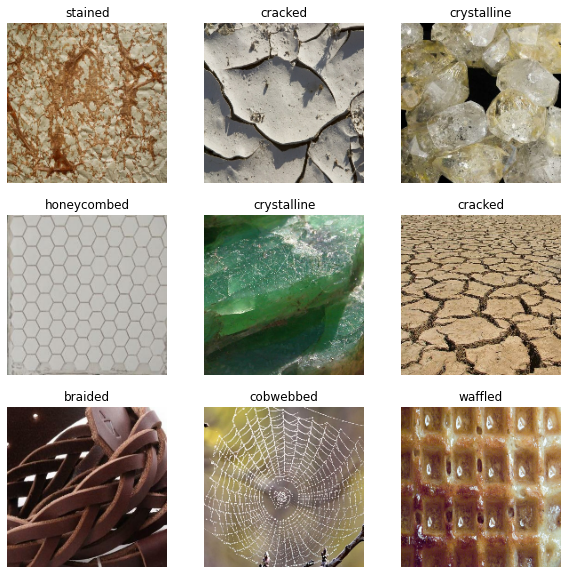

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


### Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



### *Standardize the data*

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))


0.00032677746 0.97726506


## **Create the model**

In [ ]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  ####
  ####
  ####
  #batch normalization layer we can use to increase accuracy
  tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones', beta_regularizer=None,
    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    trainable=True, virtual_batch_size=None, adjustment=None, name=None, **kwargs
)
  ####
  ####
  ####
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  #
  ##
  ###
  ####
  # dropout layer, if .2 does not work very well then try .3
  layer = tf.keras.layers.Dropout(.2, input_shape=(3,)).
  ####
  ###
  ##
  #
  ####
  ####
  # try dense layer '64' instead of 128
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## **Compile the model**


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Summary of the model**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

### Train the model

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
30/30 [==============================] - 1s 38ms/step - loss: 1.4345 - accuracy: 0.5021 - val_loss: 2.0715 - val_accuracy: 0.4083
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 1.3895 - accuracy: 0.5302 - val_loss: 2.4548 - val_accuracy: 0.3167
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 1.4213 - accuracy: 0.5146 - val_loss: 2.3390 - val_accuracy: 0.3500
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 1.3580 - accuracy: 0.5260 - val_loss: 2.6295 - val_accuracy: 0.3833
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 1.2653 - accuracy: 0.5688 - val_loss: 2.1489 - val_accuracy: 0.3458
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 1.2834 - accuracy: 0.5719 - val_loss: 2.6105 - val_accuracy: 0.3375
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 1.2122 - accuracy: 0.5927 - val_loss: 2.2805 - val_accuracy: 0.3625
Epoch 8/20
30

## **Visualize training results**

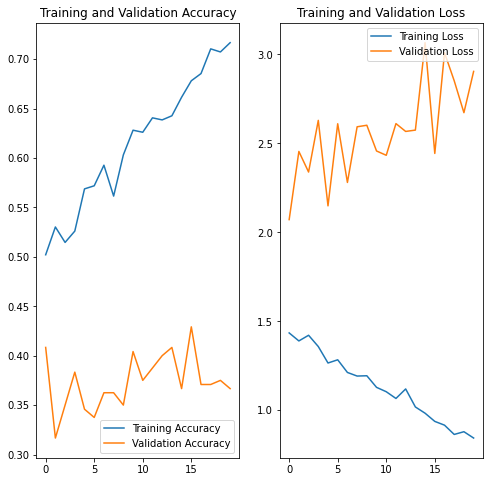

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data Augumentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

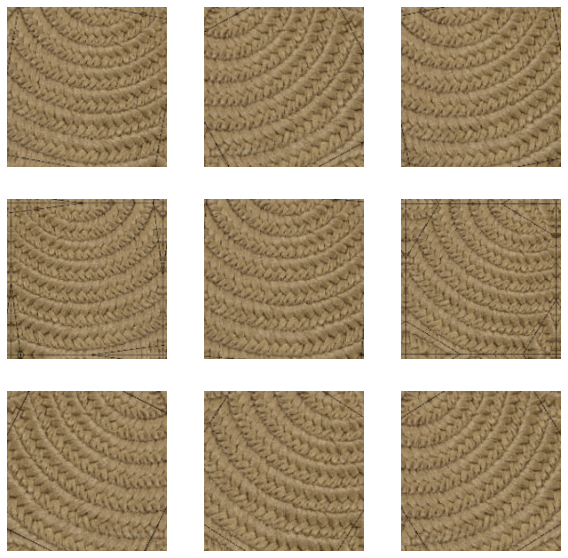

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Drop Out

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
30/30 [==============================] - 1s 47ms/step - loss: 2.2587 - accuracy: 0.1625 - val_loss: 2.1605 - val_accuracy: 0.2375
Epoch 2/15
30/30 [==============================] - 1s 38ms/step - loss: 2.1298 - accuracy: 0.2583 - val_loss: 2.1475 - val_accuracy: 0.2583
Epoch 3/15
30/30 [==============================] - 1s 38ms/step - loss: 2.0597 - accuracy: 0.2823 - val_loss: 2.0171 - val_accuracy: 0.2875
Epoch 4/15
30/30 [==============================] - 1s 38ms/step - loss: 2.0194 - accuracy: 0.2927 - val_loss: 1.9655 - val_accuracy: 0.3167
Epoch 5/15
30/30 [==============================] - 1s 38ms/step - loss: 1.9429 - accuracy: 0.3302 - val_loss: 2.1771 - val_accuracy: 0.2958
Epoch 6/15
30/30 [==============================] - 1s 38ms/step - loss: 1.8683 - accuracy: 0.3646 - val_loss: 2.0730 - val_accuracy: 0.3458
Epoch 7/15
30/30 [==============================] - 1s 38ms/step - loss: 1.8411 - accuracy: 0.3719 - val_loss: 1.9260 - val_accuracy: 0.3833
Epoch 8/15
30

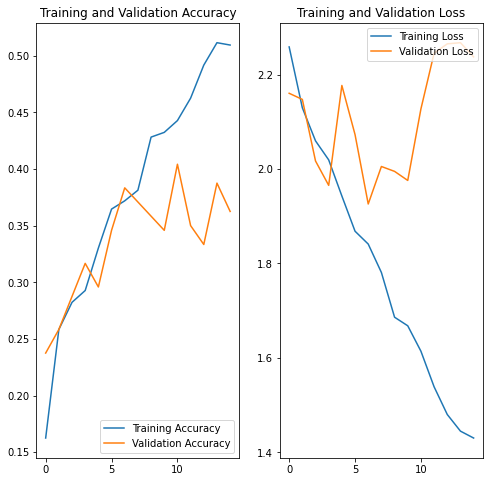

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Confusion Matrix

In [ ]:
from sklearn import metrics
print ("Classification Report:")
print (metrics.classification_report(y_test, y_pred))
print ("Confusion Matrix:")
print (metrics.confusion_matrix(y_test, y_pred))